<font size=6> <font face= "Times New Roman">G2M insight for Cab Investment firm </font></font><br>


<font size=4><strong>Part 1: Importing the libraries and understaning the datasets</strong></font>

**1.1 Import the libraries**

In [55]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import kruskal

**1.2 Import each dataset**

 <div style="text-align: center;"> <p><strong> Cab Dataset </strong></p></div> 


**Preview the Data**

In [3]:
cab_df= pd.read_csv('cab_data.csv')
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


**Check the Dimensions**

In [4]:
cab_df.shape

(359392, 7)

**Check Data Types**: Verify if the data types of each column match your expectations. 

In [5]:
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

Date of travel shows as integer, need to convert it into date. 

In [6]:
# Define the base date and convert integer values to datetime format
base_date = pd.Timestamp('1899-12-30')
cab_df['Date of Travel'] = base_date + pd.to_timedelta(cab_df['Date of Travel'], unit='D')

In [42]:
print(cab_df.head(2))

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  


**Identify Missing Data**

In [8]:
missing_data = cab_df.isnull().sum()
print("Missing data for each column:")
print(missing_data)

Missing data for each column:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


 <div style="text-align: center;"> <p><strong> City Dataset </strong></p></div> 


**Preview the data**

In [43]:
city_df= pd.read_csv('city.csv')
city_df.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


**Check the dimensions**

In [10]:
city_df.shape

(20, 3)

**Check Data Types**: Verify if the data types of each column match your expectations. 

In [11]:
city_df.dtypes

City          object
Population    object
Users         object
dtype: object

Population and users data type should be an integer. 

In [12]:
# Convert "Population" column to integer data type
city_df['Population'] = city_df['Population'].str.replace(',', '').str.strip().astype(int)
city_df['Users'] = city_df['Users'].str.replace(',', '').str.strip().astype(int)

In [13]:
city_df.dtypes

City          object
Population     int64
Users          int64
dtype: object

**Identify missing values**

In [14]:
missing_data = city_df.isnull().sum()
print("Missing data for each column:")
print(missing_data)

Missing data for each column:
City          0
Population    0
Users         0
dtype: int64


 <div style="text-align: center;"> <p><strong> Customer Dataset </strong></p></div> 


**Preview the data**

In [44]:
customer_df= pd.read_csv('customer_ID.csv')
customer_df.head(2)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


**Check the dimensions**

In [16]:
customer_df.shape

(49171, 4)

**Check Data Types**: Verify if the data types of each column match your expectations. 

In [17]:
customer_df.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

**Identify Missing Data**

In [18]:
missing_data = customer_df.isnull().sum()
print("Missing data for each column:")
print(missing_data)

Missing data for each column:
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


 <div style="text-align: center;"> <p><strong> Transaction Dataset </strong></p></div> 


**Preview the data**

In [45]:
transaction_df= pd.read_csv('transaction_ID.csv')
transaction_df.head(2)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card


**Check the dimensions**

In [20]:
transaction_df.shape

(440098, 3)

**Check Data Types**: Verify if the data types of each column match your expectations. 

In [21]:
transaction_df.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

**Identify Missing Data**

In [22]:
missing_data = transaction_df.isnull().sum()
print("Missing data for each column:")
print(missing_data)

Missing data for each column:
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


<font size=4><strong>Part 2: Create a master dataset and perform analysis </strong></font>

**2.1 Create a master dataset**

In [23]:
# Join cab_city and transaction_df
master_df = pd.merge(cab_df, transaction_df, on='Transaction ID')
# Join transaction_df and customer_df
master_df = pd.merge(master_df, customer_df, on='Customer ID')
# Append city_df based on 'City' field 
master_df = pd.merge(master_df, city_df, on='City')
master_df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701


In [24]:
# Summary statistics for numerical columns
numerical_summary = master_df.describe()
numerical_summary

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,2017-08-17 01:37:55.042293504,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
min,1.000001e+07,2016-01-02 00:00:00,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,2016-11-23 00:00:00,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,2017-09-10 00:00:00,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,2018-05-12 00:00:00,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020


**2.2 Check for missing values**

In [25]:
missing_values = master_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64


In [26]:
# Check for missing values (NaN) in the master dataset
missing_values = master_df.isna().sum()

# Print the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64


**2.3 Identify Duplicates**

In [27]:
duplicate_rows = master_df.duplicated()

# Count the total number of duplicate rows
total_duplicates = duplicate_rows.sum()

# Print the total number of duplicate rows
print("Total number of duplicate rows:", total_duplicates)

Total number of duplicate rows: 0


**2.4 Identify Unique Values in categorical columns**

In [28]:
unique_cities = master_df['City'].unique()
print("Unique cities in the 'City' column:", unique_cities)

Unique cities in the 'City' column: ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


In [29]:
unique_companies = master_df['Company'].unique()
print("Unique companies in the 'Company' column:", unique_companies)

Unique companies in the 'Company' column: ['Pink Cab' 'Yellow Cab']


**2.5 Check the correlation coefficients between numerical columns**

In [30]:
numeric_df = master_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix 


,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


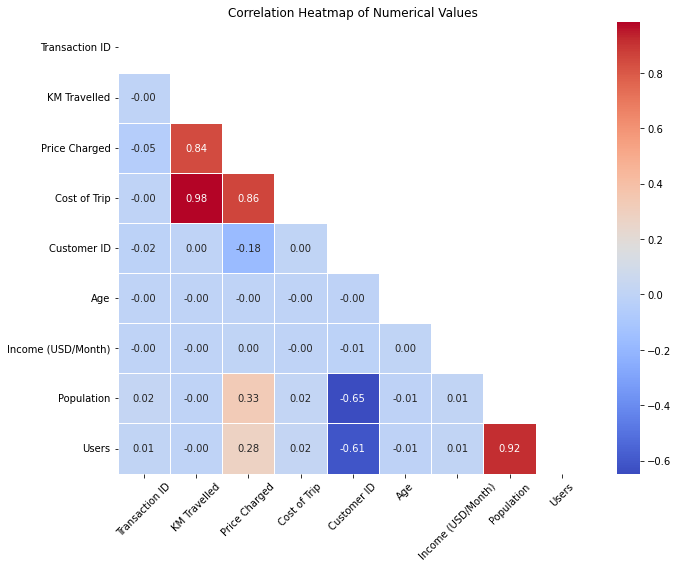

In [31]:
# Mask upper triangle and diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap of Numerical Values')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**The heatmap shows the correlation between the numerical values of the dataset.** <br> 
1. Cost of trip and price charged vs KM traveled have a strong correlation <br>
2. Users vs Population have a strong correlation

**2.6 Aggregate Data:** Aggregate the calculated metrics by company to get an overview of each company's performance.

In [32]:
grouped_by_company = master_df.groupby('Company')

# Calculate aggregated metrics
aggregated_metrics = grouped_by_company.agg({
    'Price Charged': ['sum', 'mean'],   # Total revenue and Average price charged
    'KM Travelled': 'sum',              # Total distance traveled
                                     
})
aggregated_metrics.columns = ['Total Revenue', 'Average Price Charged', 'Total Distance Traveled']

# Display aggregated metrics for each company
print("Aggregated Metrics by Company:")
print(aggregated_metrics)

Aggregated Metrics by Company:
            Total Revenue  Average Price Charged  Total Distance Traveled
Company                                                                  
Pink Cab     2.632825e+07             310.800856               1911073.11
Yellow Cab   1.258539e+08             458.181990               6199417.47


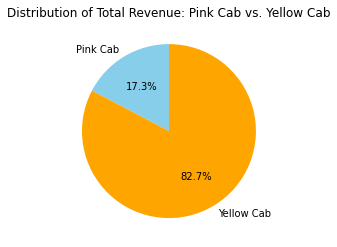

In [33]:
total_revenue_pink_cab = aggregated_metrics.loc['Pink Cab', 'Total Revenue']
total_revenue_yellow_cab = aggregated_metrics.loc['Yellow Cab', 'Total Revenue']
labels = ['Pink Cab', 'Yellow Cab']
total_revenue_values = [total_revenue_pink_cab, total_revenue_yellow_cab]

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(total_revenue_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
ax.set_title('Distribution of Total Revenue: Pink Cab vs. Yellow Cab')
plt.show()

**2.7 Average Price charged grouped by city**

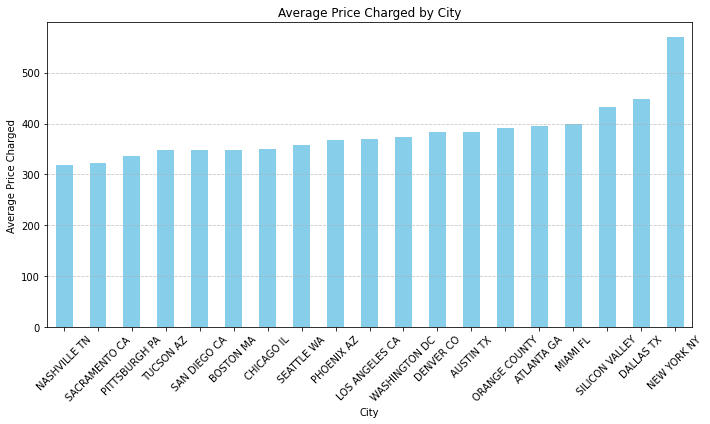

In [34]:
# Calculate average price charged for each city
Average_price_by_city = master_df.groupby('City')['Price Charged'].mean().sort_values()

# Plot bar plot for average price charged by city
plt.figure(figsize=(10, 6))
Average_price_by_city.plot(kind='bar', color='skyblue')
plt.title('Average Price Charged by City')
plt.xlabel('City')
plt.ylabel('Average Price Charged')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on y-axis
plt.tight_layout()
plt.show()

**2.8 Time Series Analysis**

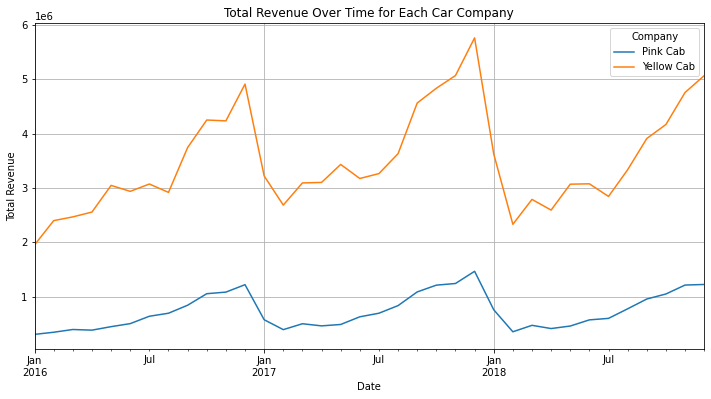

In [35]:
# Group data by company and date
grouped_data = master_df.groupby(['Company', pd.Grouper(key='Date of Travel', freq='M')])

# Calculate total revenue for each company over time
revenue_over_time = grouped_data['Price Charged'].sum().unstack(level=0)

# Plot time series for each company
plt.figure(figsize=(12, 6))
revenue_over_time.plot(ax=plt.gca())
plt.title('Total Revenue Over Time for Each Car Company')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend(title='Company')
plt.grid(True)
plt.show()


The line chart shows that at any given time cab yellow revenue is much higher compared to pink cab 

 **2.9 Relationship between cab users and population**

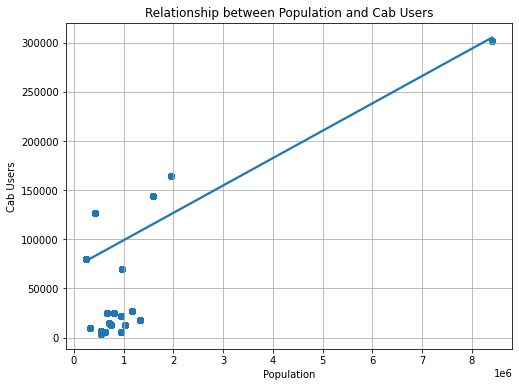

In [36]:
# Plot scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Population', y='Users', data=master_df, scatter_kws={'alpha':0.5})
plt.title('Relationship between Population and Cab Users')
plt.xlabel('Population')
plt.ylabel('Cab Users')
plt.grid(True)
plt.show()

The scatter plot shows that places with the highest population have the largest number of cab users. 

**2.10 The average cab Users for each company** 

(-1.0999999080486815, 1.099998988782967, -1.0999900372021814, 1.09999951309475)

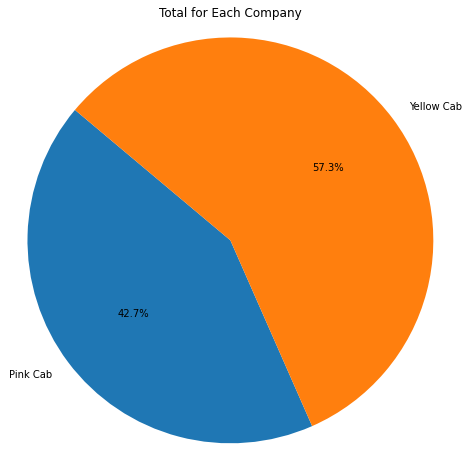

In [37]:
# Group data by company
total_users_by_company = master_df.groupby('Company')['Users'].mean()

# Plot pie chart users for each company
plt.figure(figsize=(8, 8))
plt.pie(total_users_by_company, labels=total_users_by_company.index, autopct='%1.1f%%', startangle=140)
plt.title('Total for Each Company')
plt.axis('equal')  

**2.11 Monthly users comparisons**

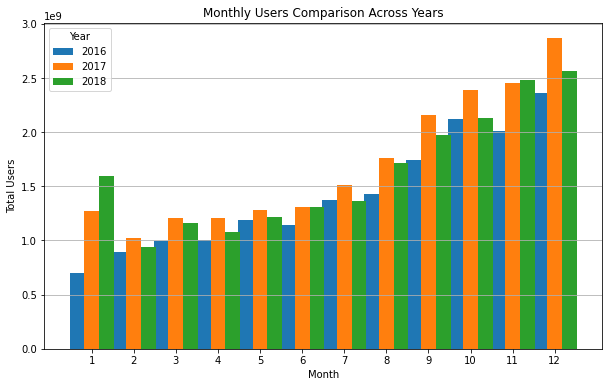

In [38]:
master_df['Date of Travel'] = pd.to_datetime(master_df['Date of Travel'])
master_df['Year'] = master_df['Date of Travel'].dt.year
master_df['Month'] = master_df['Date of Travel'].dt.month

# Group by year and month, and calculate total users
monthly_users = master_df.groupby(['Year', 'Month'])['Users'].sum().reset_index()
pivot_monthly_users = monthly_users.pivot(index='Month', columns='Year', values='Users')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
months = np.arange(1, 13)
width = 0.35

for i, year in enumerate(pivot_monthly_users.columns):
    plt.bar(months + i*width, pivot_monthly_users[year], width, label=str(year))

plt.title('Monthly Users Comparison Across Years')
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.xticks(months + width*(len(pivot_monthly_users.columns)/2 - 0.5), months)
plt.legend(title='Year', loc='upper left')
plt.grid(axis='y')
plt.show()

The chart shows an increas in the number of cab users during the months of fall and winter, for each given year.

**2.12 Numerical variables Distribution**

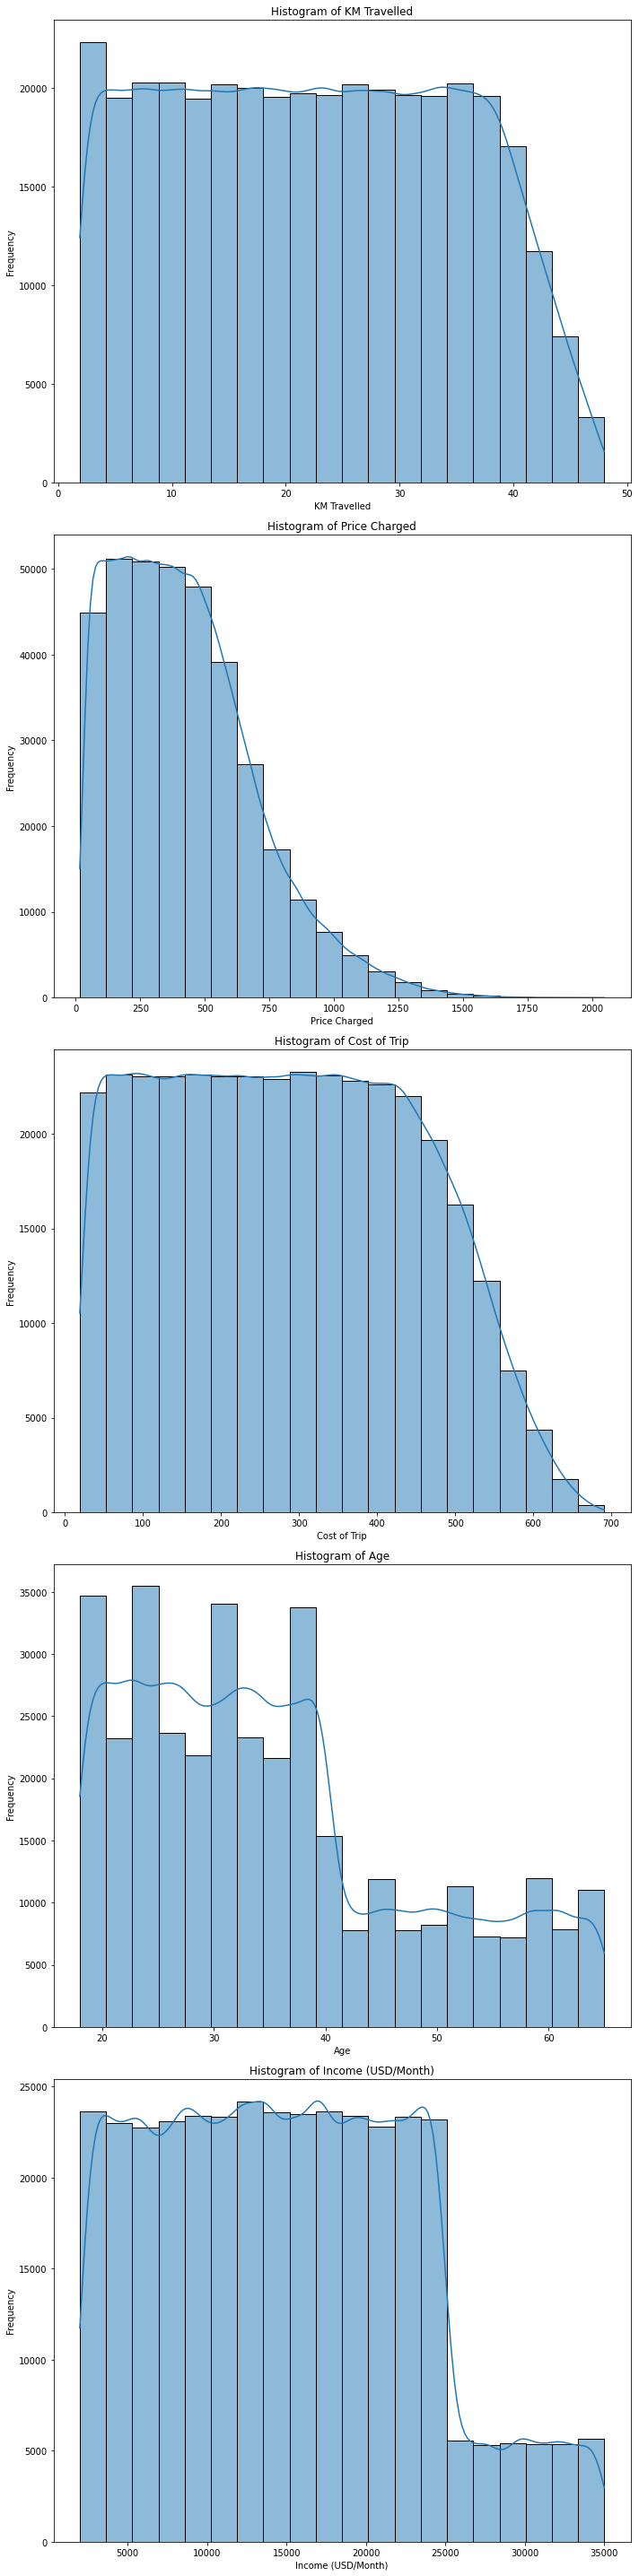

In [39]:
# Select numerical columns for histogram
numerical_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 8*len(numerical_cols)))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(master_df[col], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

**2.13 Identifying Outliers**

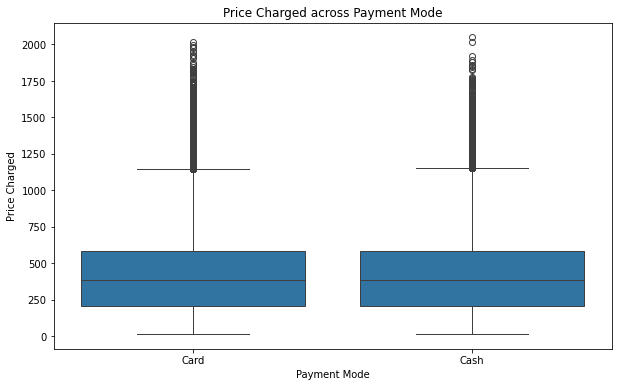

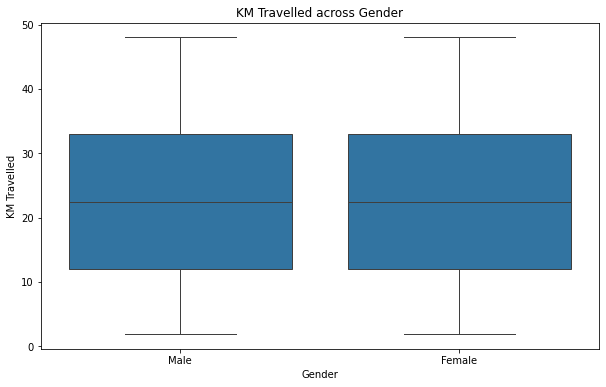

In [40]:

# Box plot for Price Charged across Payment_Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment_Mode', y='Price Charged', data=master_df)
plt.title('Price Charged across Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Price Charged')
plt.show()

# Box plot for KM Travelled across Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='KM Travelled', data=master_df)
plt.title('KM Travelled across Gender')
plt.xlabel('Gender')
plt.ylabel('KM Travelled')
plt.show()


**2.14 Profit Margin** 

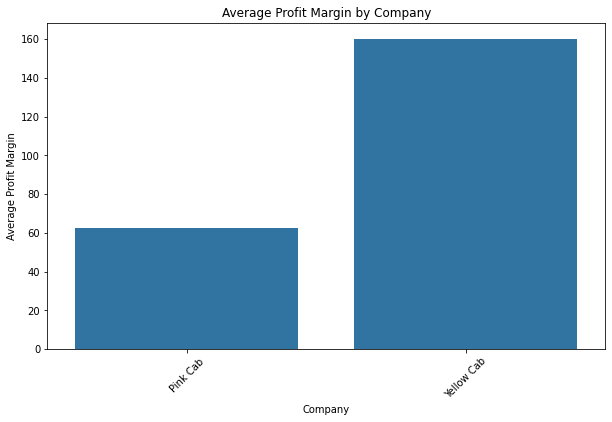

In [46]:
# Calculate profit margin
master_df['Profit Margin'] = master_df['Price Charged'] - master_df['Cost of Trip']

# Group by company and calculate average profit margin
company_profit = master_df.groupby('Company')['Profit Margin'].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Profit Margin', data=company_profit)
plt.title('Average Profit Margin by Company')
plt.xlabel('Company')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)
plt.show()


The average profit margin of Yellow Cab is higher compare to Pink Cab 

**2.15 Performance for each company**

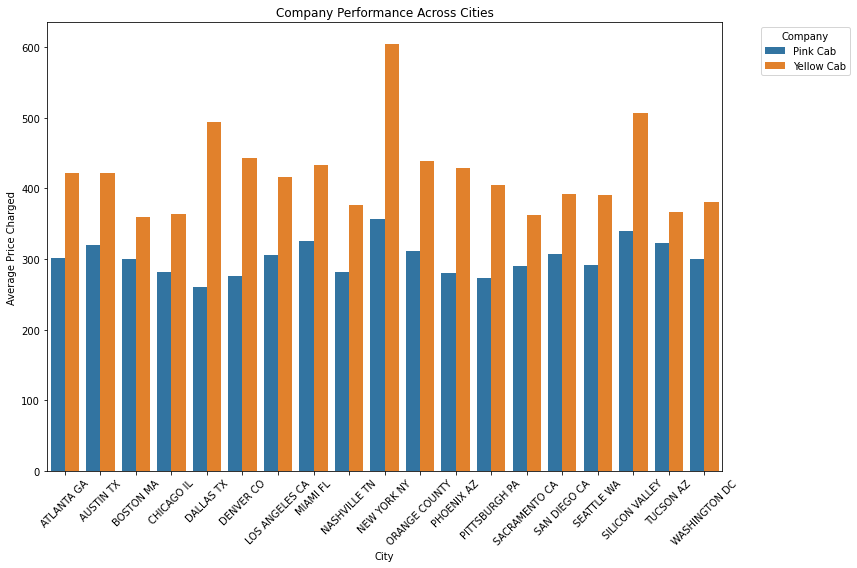

In [47]:

# Group by city and company and calculate performance metric
city_company_performance = master_df.groupby(['City', 'Company'])['Price Charged'].mean().reset_index()

# Plot grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Price Charged', hue='Company', data=city_company_performance)
plt.title('Company Performance Across Cities')
plt.xlabel('City')
plt.ylabel('Average Price Charged')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

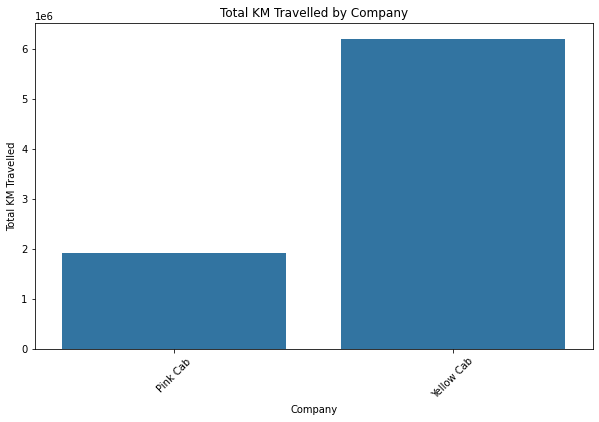

In [51]:
# Group by company and calculate total KM Travelled
company_km_travelled = master_df.groupby('Company')['KM Travelled'].sum().reset_index()

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='KM Travelled', data=company_km_travelled)
plt.title('Total KM Travelled by Company')
plt.xlabel('Company')
plt.ylabel('Total KM Travelled')
plt.xticks(rotation=45)
plt.show()

Yellow Cab travelled almost 3 times more than Pink Cab, and the average priced charged is higher for each city. 

<font size=4><strong>Part 3: Hypothesis and investigation </strong></font>

**Hypothesis 1: Is there a difference in the price charged based on the Gender**

**H0:** Gender does not affect the amount charged for travel. <br>
**H1:** Gender does affect the amount charged for travel.


In [52]:

male_prices = master_df[master_df['Gender'] == 'Male']['Price Charged']
female_prices = master_df[master_df['Gender'] == 'Female']['Price Charged']

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_prices, female_prices, equal_var=False)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis. Gender does affect the amount charged for travel.")
else:
    print("Fail to reject null hypothesis. Gender does not affect the amount charged for travel.")


T-statistic: 7.616455947441941
P-value: 2.6141423053942424e-14
Reject null hypothesis. Gender does affect the amount charged for travel.


**Hypothesis 2:** Is there a correlation between distance traveled and price charged<br> <br>
H0: There is no correlation between the distance traveled (KM Travelled) and the price charged for travel.<br>
H1: There is a correlation between the distance traveled (KM Travelled) and the price charged for travel.

In [53]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(master_df['KM Travelled'], master_df['Price Charged'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis. There is a correlation between distance traveled and price charged.")
else:
    print("Fail to reject null hypothesis. There is no correlation between distance traveled and price charged.")

Pearson correlation coefficient: 0.8357531580209405
P-value: 0.0
Reject null hypothesis. There is a correlation between distance traveled and price charged.


**Hypothesis 3: Is there a difference in the price charged between different payment methods** <br> <br>
H0: There is no difference in the average price charged between different payment modes.<br>
H1: There is a difference in the average price charged between different payment modes.

In [54]:
cash_prices = master_df[master_df['Payment_Mode'] == 'Cash']['Price Charged']
card_prices = master_df[master_df['Payment_Mode'] == 'Card']['Price Charged']

# Perform t-test
t_stat, p_value = ttest_ind(cash_prices, card_prices, equal_var=False)

# Print t-test result
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis. There is a difference in the average price charged between different payment modes.")
else:
    print("Fail to reject null hypothesis. There is no difference in the average price charged between different payment modes.")


T-statistic: 0.13563330060174303
P-value: 0.8921112674816917
Fail to reject null hypothesis. There is no difference in the average price charged between different payment modes.


**Hypothesis 4: Is there any difference in Profit between different age** <br><br>
H0: There is no difference in the Profit between different age groups in both cab companies. <br>
H1: T There is a difference in the Profit between different age groups in both cab companies.

In [63]:
a = master_df[(master_df.Age <= 60)&(master_df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = master_df[(master_df.Age >= 60)&(master_df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis.  There is a difference in the Profit between different age groups in Pink cab company.")
else:
    print("Fail to reject null hypothesis.  There is no difference in the Profit between different age groups in Pink cab company.")

80125 5429
Fail to reject null hypothesis.  There is no difference in the Profit between different age groups in Pink cab company.


In [64]:
a = master_df[(master_df.Age <= 60)&(master_df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = master_df[(master_df.Age >= 60)&(master_df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis.  There is a difference in the Profit between different age groups in Yellow cab company.")
else:
    print("Fail to reject null hypothesis.  There is no difference in the Profit between different age groups in Yellow cab company.")

260356 17257
Reject null hypothesis.  There is a difference in the Profit between different age groups in Yellow cab company.
